In [1]:
import json
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
from pandarallel import pandarallel
import pathlib
import matplotlib.pyplot as plt

pandarallel.initialize(progress_bar=True)

color= '#003060'

cn = ['#81c4e4', '#943475']

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
df = pd.read_pickle('/Users/landsiedelj/washington_post_bias/WP_article_100K_with_gender_final.pkl')

In [3]:
df.head(2)

,id,article_url,title,author,type,source,publish_date,orig-id,merged_total_text,entity,entity_type,wiki_gender
0,ABM35HDPIII6RP4GUI2RWXWOTE,/opinions/the-hollow-compassion-of-trump-wary-...,Trump’s America goes full Charles Dickens,Dana Milbank,NaN,NaN,NaN,NaN,Trump’s America goes full Charles Dickens. Don...,Donald Trump,PERSON,male
2,ABM35HDPIII6RP4GUI2RWXWOTE,/opinions/the-hollow-compassion-of-trump-wary-...,Trump’s America goes full Charles Dickens,Dana Milbank,NaN,NaN,NaN,NaN,Trump’s America goes full Charles Dickens. Don...,Charles Dickens,PERSON,male


In [4]:
def findCategory(x):
    import numpy as np
    try:
        articleUrl = x.article_url

        if articleUrl[:5] == 'https':
            category = articleUrl.split('/')[3]
        elif articleUrl[:1] == '/':
            category = articleUrl.split('/')[1]
        else:
            category = 'other'
        return category
    except:
        return np.nan

# find category from article_url
df['category'] = df.parallel_apply(findCategory, axis=1)

In [5]:
df.groupby('wiki_gender')["id"].count().sort_values(ascending=False)

wiki_gender
male             1022160
unknown           513114
female            264808
mostly_male        43068
mostly_female      33868
andy               20181
non-binary           505
Name: id, dtype: int64

Text(0, 0.5, '# Articles')

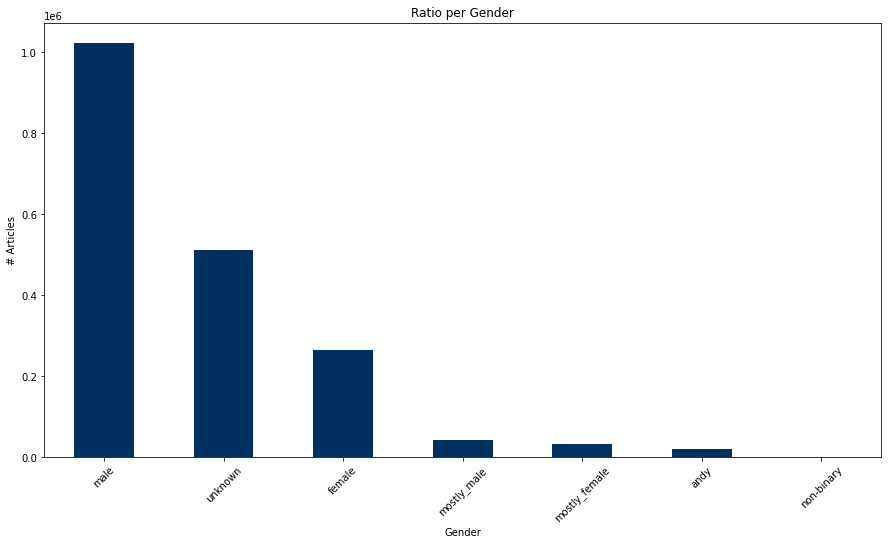

In [6]:
df.groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='bar', color=color, figsize=(15, 8), rot=45)
plt.title('Ratio per Gender')
plt.xlabel('Gender')
plt.ylabel('# Articles')

Text(0, 0.5, '# articles')

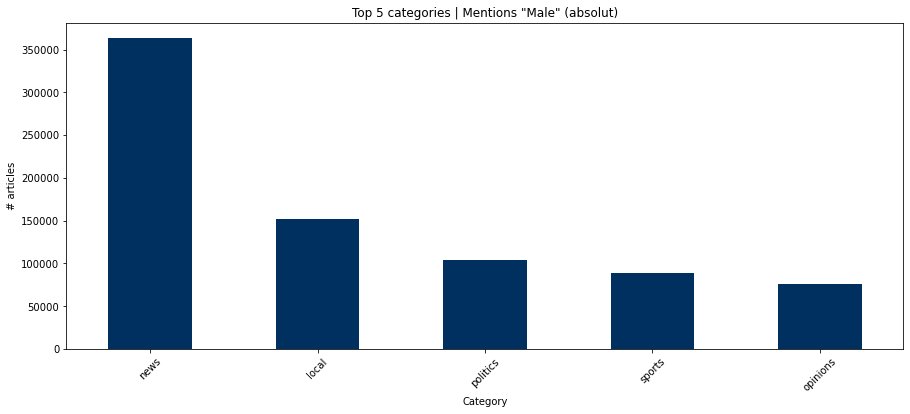

In [7]:
# Top 5 categories (absolut) - mentions "male"
df[df.wiki_gender == 'male'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5).plot(kind='bar', color=color, figsize=(15, 6), rot=45)
plt.title('Top 5 categories | Mentions "Male" (absolut)')
plt.xlabel('Category')
plt.ylabel('# articles')

Text(0, 0.5, '# articles')

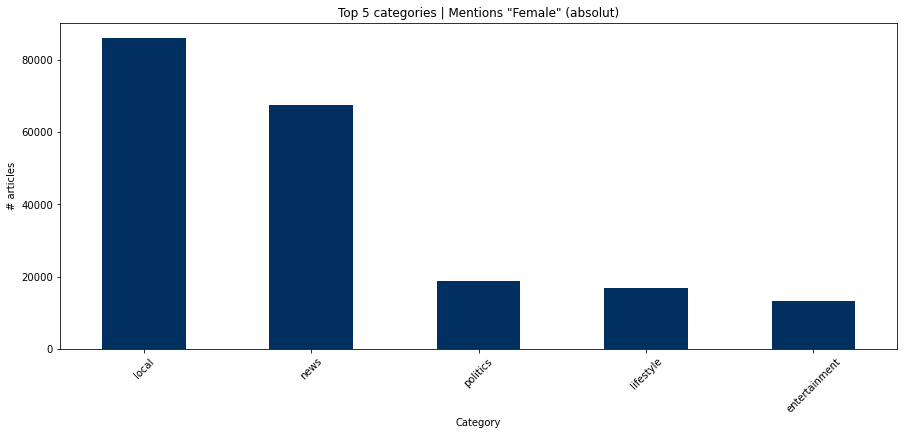

In [8]:
# Top 5 categories (absolut) - mentions "Female"
df[df.wiki_gender == 'female'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5).plot(kind='bar', color=color, figsize=(15, 6), rot=45)
plt.title('Top 5 categories | Mentions "Female" (absolut)')
plt.xlabel('Category')
plt.ylabel('# articles')

Text(0, 0.5, '')

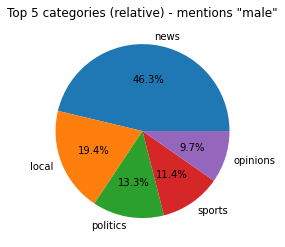

In [9]:
# Top 5 categories (relative) - mentions "male"
top_male = pd.DataFrame(df[df.wiki_gender == 'male'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_male["total"] = df[df["wiki_gender"] == 'male']["id"].count()
top_male["relative"] = top_male["id"] / top_male["total"] * 100
top_male["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 categories (relative) - mentions "male"')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

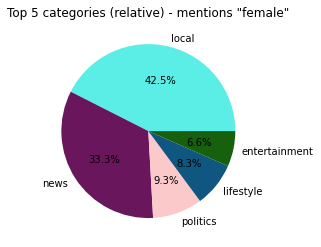

In [10]:
color_ = ['#5beee6', '#69165c', '#fbc9c9', '#0f5680' , '#17600e']
# Top 5 categories (relative) - mentions "Female"
top_female = pd.DataFrame(df[df.wiki_gender == 'female'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_female["total"] = df[df["wiki_gender"] == 'female']["id"].count()
top_female["relative"] = top_female["id"] / top_female["total"] * 100
top_female["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=color_)
plt.title('Top 5 categories (relative) - mentions "female"')
plt.xlabel("")
plt.ylabel("")

In [11]:
gender = ["andy", "female", "male", "mostly_female", "mostly_male", "unknown", "non-binary"]
other = ["andy", "mostly_female", "mostly_male", "unknown", "non-binary"]

wiki_gender
female     18703
male      104324
Name: id, dtype: int64


Text(0, 0.5, '')

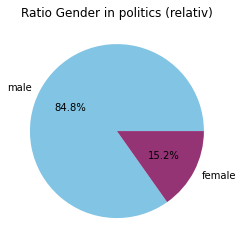

In [12]:
# Ratio Gender in politics
cn = ['#81c4e4', '#943475']
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'politics')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'politics')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in politics (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     67356
male      363068
Name: id, dtype: int64


Text(0, 0.5, '')

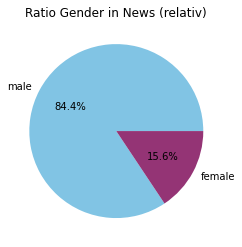

In [13]:
# Ratio Gender in News

print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'news')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'news')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in News (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     85900
male      152286
Name: id, dtype: int64


Text(0, 0.5, '')

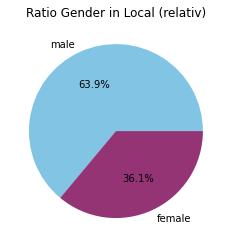

In [14]:
# Ratio Gender in Local
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'local')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'local')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Local (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     9063
male      89182
Name: id, dtype: int64


Text(0, 0.5, '')

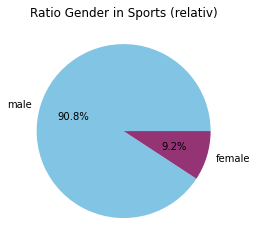

In [15]:
# Ratio Gender in Sports
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'sports')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'sports')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Sports (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    12571
male      75893
Name: id, dtype: int64


Text(0, 0.5, '')

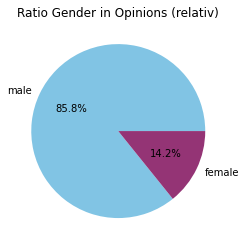

In [16]:
# Ratio Gender in Opinions
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'opinions')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'opinions')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Opinions (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    10469
male      51835
Name: id, dtype: int64


Text(0, 0.5, '')

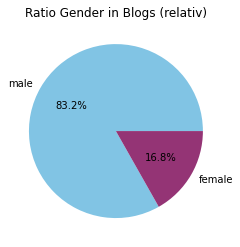

In [17]:
# Ratio Gender in Blogs
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'blogs')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'blogs')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Blogs (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    16736
male      28699
Name: id, dtype: int64


Text(0, 0.5, '')

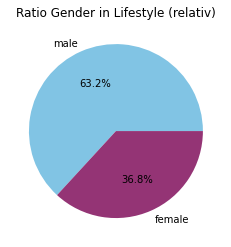

In [18]:
# Ratio Gender in Lifestyle
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Lifestyle (relativ)')
plt.xlabel("")
plt.ylabel("")

# Analysis w/ smaller data set

Due to a annoying memory error reducing the data set (count > 3 and drop gender "unknown", also for Top 20 Person drop entities w/out surname (drop Ryan etc. first name or surname))

In [19]:
df_small = df.groupby('entity').filter(lambda x : len(x)>3) # Filter entities with > 3 mentions
del df_small['entity_type'] # Drop col

In [20]:
# Drop unknown from gender column
df_small = df_small[df_small['wiki_gender'] != 'unknown']
count = df_small['entity'].str.split().str.len()
df_small = df_small[~(count==1)]
print(df_small.shape)

(766977, 12)


In [21]:
'''df_small['entity'].value_counts(sort=True).nlargest(10).plot.bar(figsize=(15,6), color=color, rot=30)
#plt.title('Top 10 used keywords overall', fontsize=20)
plt.xlabel('Person', fontsize=18)
plt.ylabel('Number of mentions', fontsize=18)
plt.tick_params(labelsize=16) 
plt.rcParams["axes.labelsize"] = 18'''

'df_small[\'entity\'].value_counts(sort=True).nlargest(10).plot.bar(figsize=(15,6), color=color, rot=30)\n#plt.title(\'Top 10 used keywords overall\', fontsize=20)\nplt.xlabel(\'Person\', fontsize=18)\nplt.ylabel(\'Number of mentions\', fontsize=18)\nplt.tick_params(labelsize=16) \nplt.rcParams["axes.labelsize"] = 18'

<AxesSubplot:xlabel='count', ylabel='entity'>

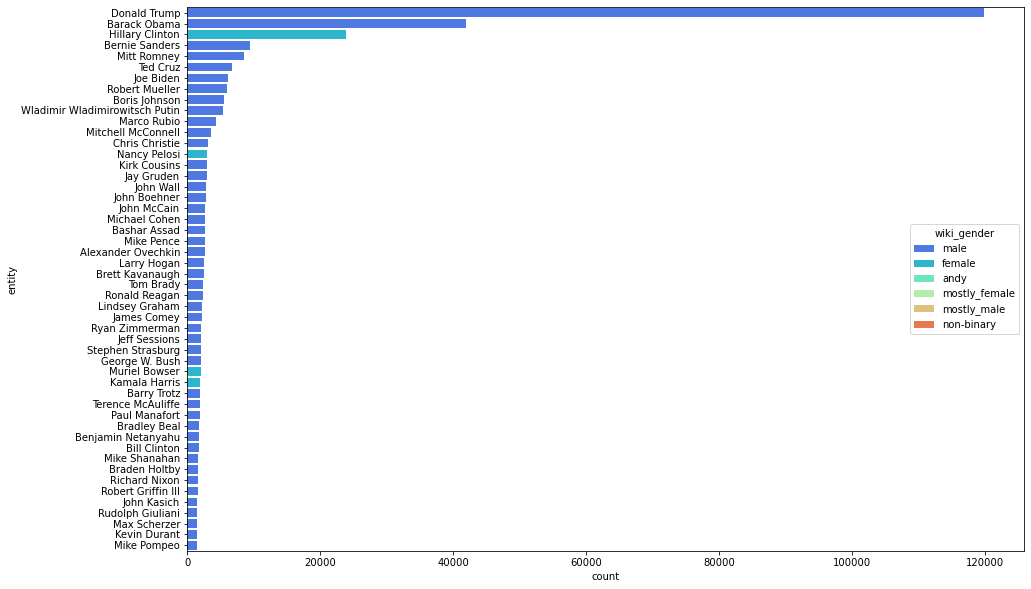

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y="entity", hue="wiki_gender", data=df_small, palette="rainbow",
              order=df_small.entity.value_counts().iloc[:50].index, dodge=False)

In [23]:
df_small.wiki_gender.value_counts()

male             638251
female           105149
mostly_male       13492
mostly_female      6554
andy               3422
non-binary          109
Name: wiki_gender, dtype: int64

In [24]:
df_small = df_small[['id','entity','wiki_gender']]
#df_small = df_small.groupby('id').agg(lambda x: x.tolist()).reset_index()

In [25]:
df_small = pd.merge(df_small,df[['id','merged_total_text', 'category']],on='id', how='left')


wiki_gender
female     1677058
male      11866407
Name: id, dtype: int64


Text(0, 0.5, '')

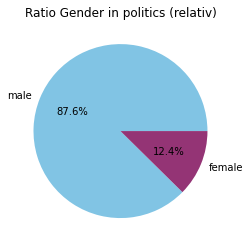

In [26]:
# Ratio Gender in politics
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'politics')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'politics')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in politics (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     2120915
male      12876364
Name: id, dtype: int64


Text(0, 0.5, '')

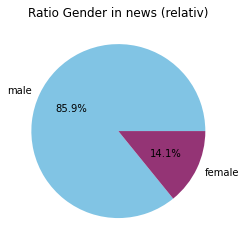

In [27]:
# Ratio Gender in news
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'news')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'news')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in news (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    217458
male      624655
Name: id, dtype: int64


Text(0, 0.5, '')

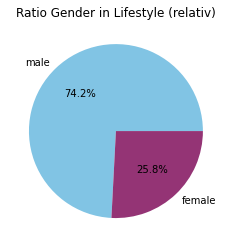

In [28]:
# Ratio Gender in Lifestyle
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Lifestyle (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    217458
male      624655
Name: id, dtype: int64


Text(0, 0.5, '')

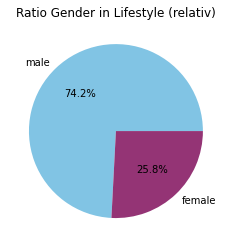

In [29]:
# Ratio Gender in Lifestyle
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Lifestyle (relativ)')
plt.xlabel("")
plt.ylabel("")

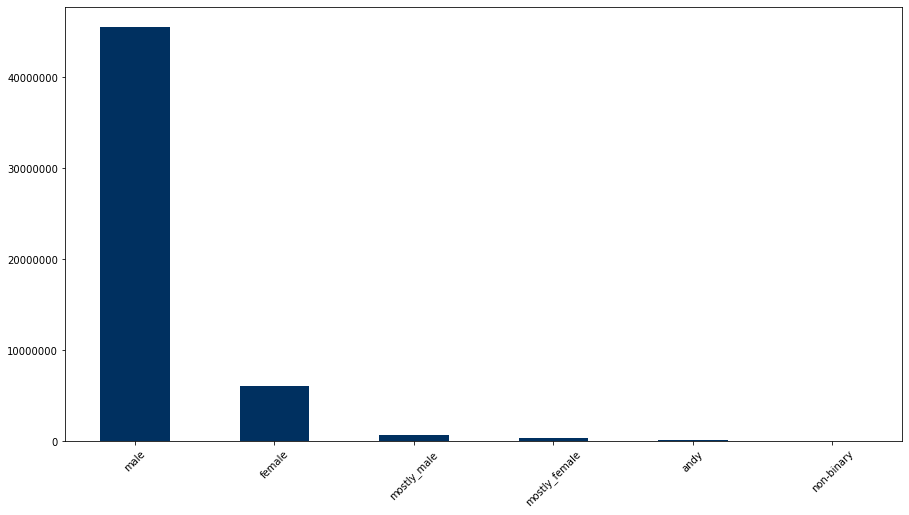

In [30]:
df_small.wiki_gender.value_counts().plot(kind='bar', rot=45, figsize=(15,8), color=color)
plt.ticklabel_format(style='plain', axis='y')